In [1]:
# Import dependencies
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
with open("BigSim.pkl", "rb") as file:
    data = pickle.load(file)


### A. Unpack simulation parameters

In [2]:
# Rhos are repated 10 times thos we only take the first one
rhos = data["simulation_parameters"]["rho"][1] 

# Based on the code from simulator_class.py, the first element of each array is rho- and the second is rho+

rho_plus = rhos[: , 1]
rho_minus = rhos[:, 0]

# Unpack all other parameters

h_p = data["simulation_parameters"]["h_p"][1] 
p_5 = data["simulation_parameters"]["p_5"][1]
p_4 = data["simulation_parameters"]["p_4"][1]
p_2 = data["simulation_parameters"]["p_2"][1]
p_1 = data["simulation_parameters"]["p_1"][1]
bias_5_star = data["simulation_parameters"]["bias_5_star"][1]

### B. Unpack timeseries

In [3]:
# Timeseries
simulations = data["simulations"]
simulations.shape

# reshape simulations from (32, 1600) to (51200,)
flattened_simulations = simulations.reshape(-1) 
flattened_simulations.shape

(51200,)

In [4]:
# Preserving only the final element of each timeseries i.e. the final histogram of revies for each product
processed_simulations = np.array([subarray[-1] for subarray in flattened_simulations]) 
processed_simulations.shape

(51200, 5)

In [5]:
# Compute total reviews per product
total_reviews_per_prod = processed_simulations.sum(axis=1).reshape(-1, 1)
total_reviews_per_prod.shape

(51200, 1)

### C. Data analysis

In [6]:
# Combine processed data in a dataframe
combined_data = pd.DataFrame({
    'reviews': total_reviews_per_prod[:, 0],
    'rho_minus': rho_minus,
    'rho_plus' : rho_plus,
    'h_p': h_p,
    'p_5': p_5,
    'p_4': p_4,
    'p_2': p_2,
    'p_1': p_1,
    'bias_5_star': bias_5_star
})

combined_data.head(10)

reviews  rho_minus  rho_plus       h_p       p_5       p_4       p_2  \
0    102.0   0.336901  1.759946  0.554926  0.511689  0.455021  0.292442   
1    172.0   1.290840  0.379235  0.821955  0.685156  0.446281  0.640280   
2    183.0   2.472280  1.073679  0.302313  0.847969  0.607705  0.471639   
3     76.0   2.161779  1.545376  0.731545  0.594456  0.493267  0.698663   
4     28.0   3.887932  3.128036  0.285181  0.764191  0.294805  0.713514   
5    101.0   0.467716  2.779763  0.424630  0.536300  0.335936  0.600498   
6     47.0   0.798320  3.174711  0.107539  0.829882  0.290301  0.298570   
7    154.0   1.808031  0.625924  0.639736  0.674900  0.333863  0.448036   
8    283.0   1.673125  0.066072  0.387915  0.537587  0.275610  0.538289   
9    197.0   2.035928  0.355816  0.264415  0.659352  0.599749  0.419552   

        p_1  bias_5_star  
0  0.526276     0.087470  
1  0.992640     0.052442  
2  0.958088     0.636502  
3  0.985405     0.958686  
4  0.945335     0.409340  
5  0.638462     0.861913  
6  0.600976     0.440231  
7  0.863423     0.930895  
8  0.505519     0.557157  
9  0.874482     0.948145

In [7]:
# Descriptive statistics of the data
combined_data.describe()

reviews     rho_minus      rho_plus           h_p           p_5  \
count  51200.000000  51200.000000  51200.000000  51200.000000  51200.000000   
mean     105.000000      1.997457      2.002448      0.501463      0.749128   
std       79.215846      1.155039      1.152399      0.288397      0.144160   
min        7.000000      0.000132      0.000018      0.000001      0.500014   
25%       44.000000      0.998764      1.007596      0.251622      0.624690   
50%       71.000000      1.991192      1.999879      0.502986      0.748167   
75%      161.000000      2.998749      3.003038      0.749418      0.874041   
max      904.000000      3.999972      3.999779      0.999992      0.999990   

                p_4           p_2           p_1   bias_5_star  
count  51200.000000  51200.000000  51200.000000  51200.000000  
mean       0.499813      0.501201      0.750046      0.497112  
std        0.145057      0.144623      0.144339      0.287689  
min        0.250017      0.250015      0.500011      0.000010  
25%        0.374190      0.376279      0.625472      0.248451  
50%        0.499258      0.501621      0.750104      0.497252  
75%        0.626081      0.627422      0.874998      0.745991  
max        0.749998      0.749992      0.999997      0.999987

In [8]:
# Outlier threshold for reviews (Tukey's mehtod)

upper_outlier_threshold = 161 + ((161 - 44) * 1.5) # (Q3 + IQR * 1.5)
lower_outlier_threshold = 44 - ((161 - 44) * 1.5)  # (Q1 - IQR * 1.5)

print(f" Upper outlier threshold for number of reviews:  {upper_outlier_threshold}")
print(f" Lower outlier threshold for number of reviews:  {lower_outlier_threshold}") # Lower than 0: discarded

 Upper outlier threshold for number of reviews:  336.5
 Lower outlier threshold for number of reviews:  -131.5


### C.1 Rho+

In [9]:
# Compute pearson corr for rho+

perason_corr_plus = round(combined_data['reviews'].corr(combined_data['rho_plus']),4)
print(f"Pearson corr. between rho+ values and Nº of reviews is: {perason_corr_plus }")

Pearson corr. between rho+ values and Nº of reviews is: -0.7875


In [10]:
# Compute spearman corr for rho+

spearman_corr_plus = round(combined_data['reviews'].corr(combined_data['rho_plus'], method='spearman'),4)
print(f"Spearman corr. between rho+ values and Nº of reviews is: {spearman_corr_plus}")

Spearman corr. between rho+ values and Nº of reviews is: -0.7895


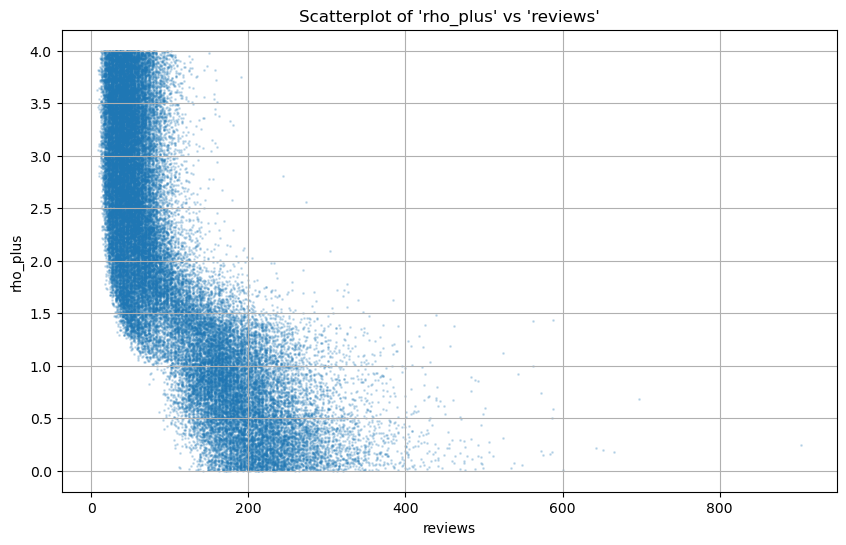

In [11]:
# Scatterplot of reviews vs rho+

plt.figure(figsize=(10,6))
plt.scatter(combined_data["reviews"], combined_data["rho_plus"], alpha=0.2, s=1)
plt.title("Scatterplot of 'rho_plus' vs 'reviews'")
plt.xlabel("reviews")
plt.ylabel("rho_plus")
plt.grid(True)
plt.show()

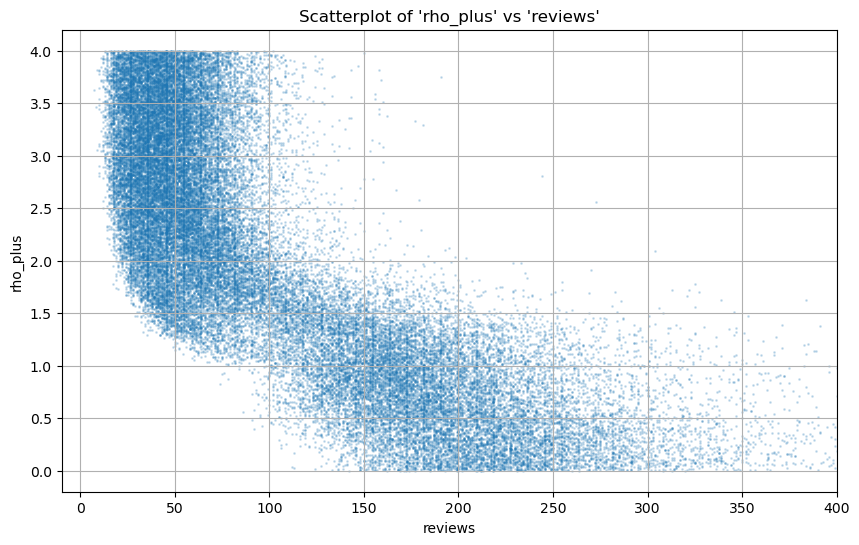

In [12]:
# Scatterplot of reviews vs rho+ (Only products with less thna 400 reviews)

plt.figure(figsize=(10,6))
plt.scatter(combined_data["reviews"], combined_data["rho_plus"], alpha=0.2, s=1)
plt.title("Scatterplot of 'rho_plus' vs 'reviews'")
plt.xlabel("reviews")
plt.ylabel("rho_plus")
plt.xlim(-10,400)
plt.grid(True)
plt.show()

### C.2 Rho-

In [13]:
# Compute pearson corr for rho-

perason_corr_minus = round(combined_data['reviews'].corr(combined_data['rho_minus']),4)
print(f"Pearson corr. between rho- values and Nº of reviews is: {perason_corr_minus }")

Pearson corr. between rho- values and Nº of reviews is: -0.2473


In [14]:
# Compute spearman corr for rho-

spearman_corr_minus = round(combined_data['reviews'].corr(combined_data['rho_minus'], method='spearman'),4)
print(f"Spearman corr. between rho- values and Nº of reviews is: {spearman_corr_minus}")

Spearman corr. between rho- values and Nº of reviews is: -0.3451


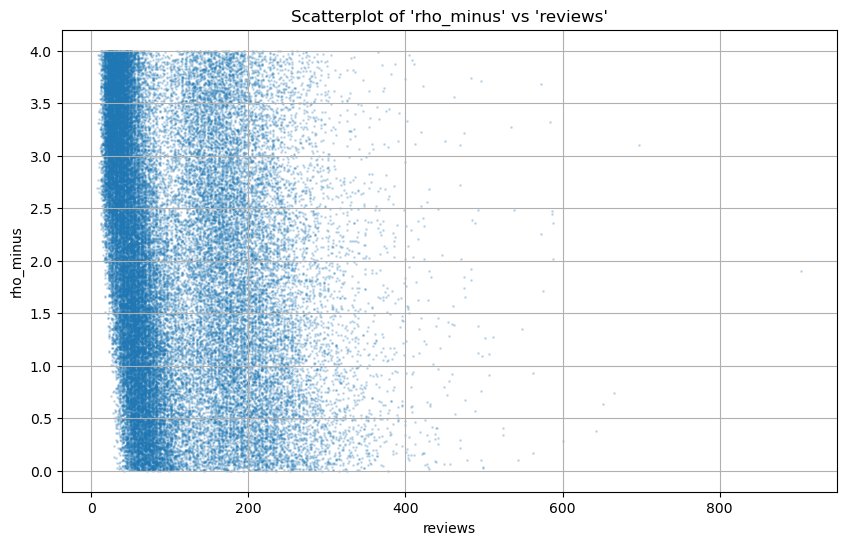

In [15]:
# Scatterplot of reviews vs rho-

plt.figure(figsize=(10,6))
plt.scatter(combined_data["reviews"], combined_data["rho_minus"], alpha=0.2, s=1)
plt.title("Scatterplot of 'rho_minus' vs 'reviews'")
plt.xlabel("reviews")
plt.ylabel("rho_minus")
plt.grid(True)
plt.show()

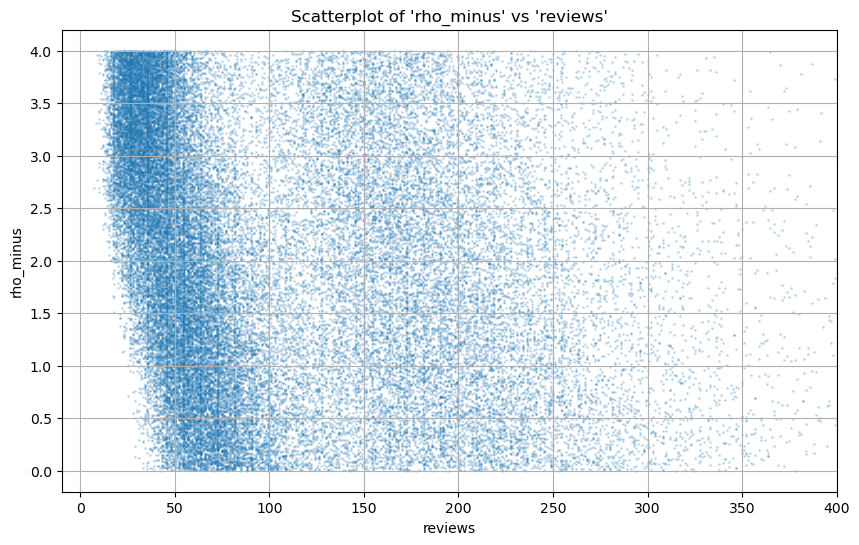

In [16]:
# Scatterplot of reviews vs rho- (Only products with less thna 400 reviews)

plt.figure(figsize=(10,6))
plt.scatter(combined_data["reviews"], combined_data["rho_minus"], alpha=0.2, s=1)
plt.title("Scatterplot of 'rho_minus' vs 'reviews'")
plt.xlabel("reviews")
plt.ylabel("rho_minus")
plt.xlim(-10,400)
plt.grid(True)
plt.show()

### C.3 Remaining parameters

In [17]:
# Pearson correlation:

columns = ['h_p', 'p_5', 'p_4', 'p_2', 'p_1', 'bias_5_star']

for col in columns:
    pearson_corr = round(combined_data['reviews'].corr(combined_data[col]), 4)
    print(f"Pearson corr. between {col} values and Nº of reviews is: {pearson_corr}")

Pearson corr. between h_p values and Nº of reviews is: 0.0102
Pearson corr. between p_5 values and Nº of reviews is: 0.0269
Pearson corr. between p_4 values and Nº of reviews is: 0.0244
Pearson corr. between p_2 values and Nº of reviews is: 0.0034
Pearson corr. between p_1 values and Nº of reviews is: -0.0004
Pearson corr. between bias_5_star values and Nº of reviews is: 0.0482


In [18]:
# Spearman correlation: 

columns = ['h_p', 'p_5', 'p_4', 'p_2', 'p_1', 'bias_5_star']

for col in columns:
    spearman_corr = round(combined_data['reviews'].corr(combined_data[col], method='spearman'), 4)
    print(f"Spearman corr. between {col} values and Nº of reviews is: {spearman_corr}")


Spearman corr. between h_p values and Nº of reviews is: 0.0087
Spearman corr. between p_5 values and Nº of reviews is: 0.0188
Spearman corr. between p_4 values and Nº of reviews is: 0.0149
Spearman corr. between p_2 values and Nº of reviews is: 0.0037
Spearman corr. between p_1 values and Nº of reviews is: 0.0008
Spearman corr. between bias_5_star values and Nº of reviews is: 0.131


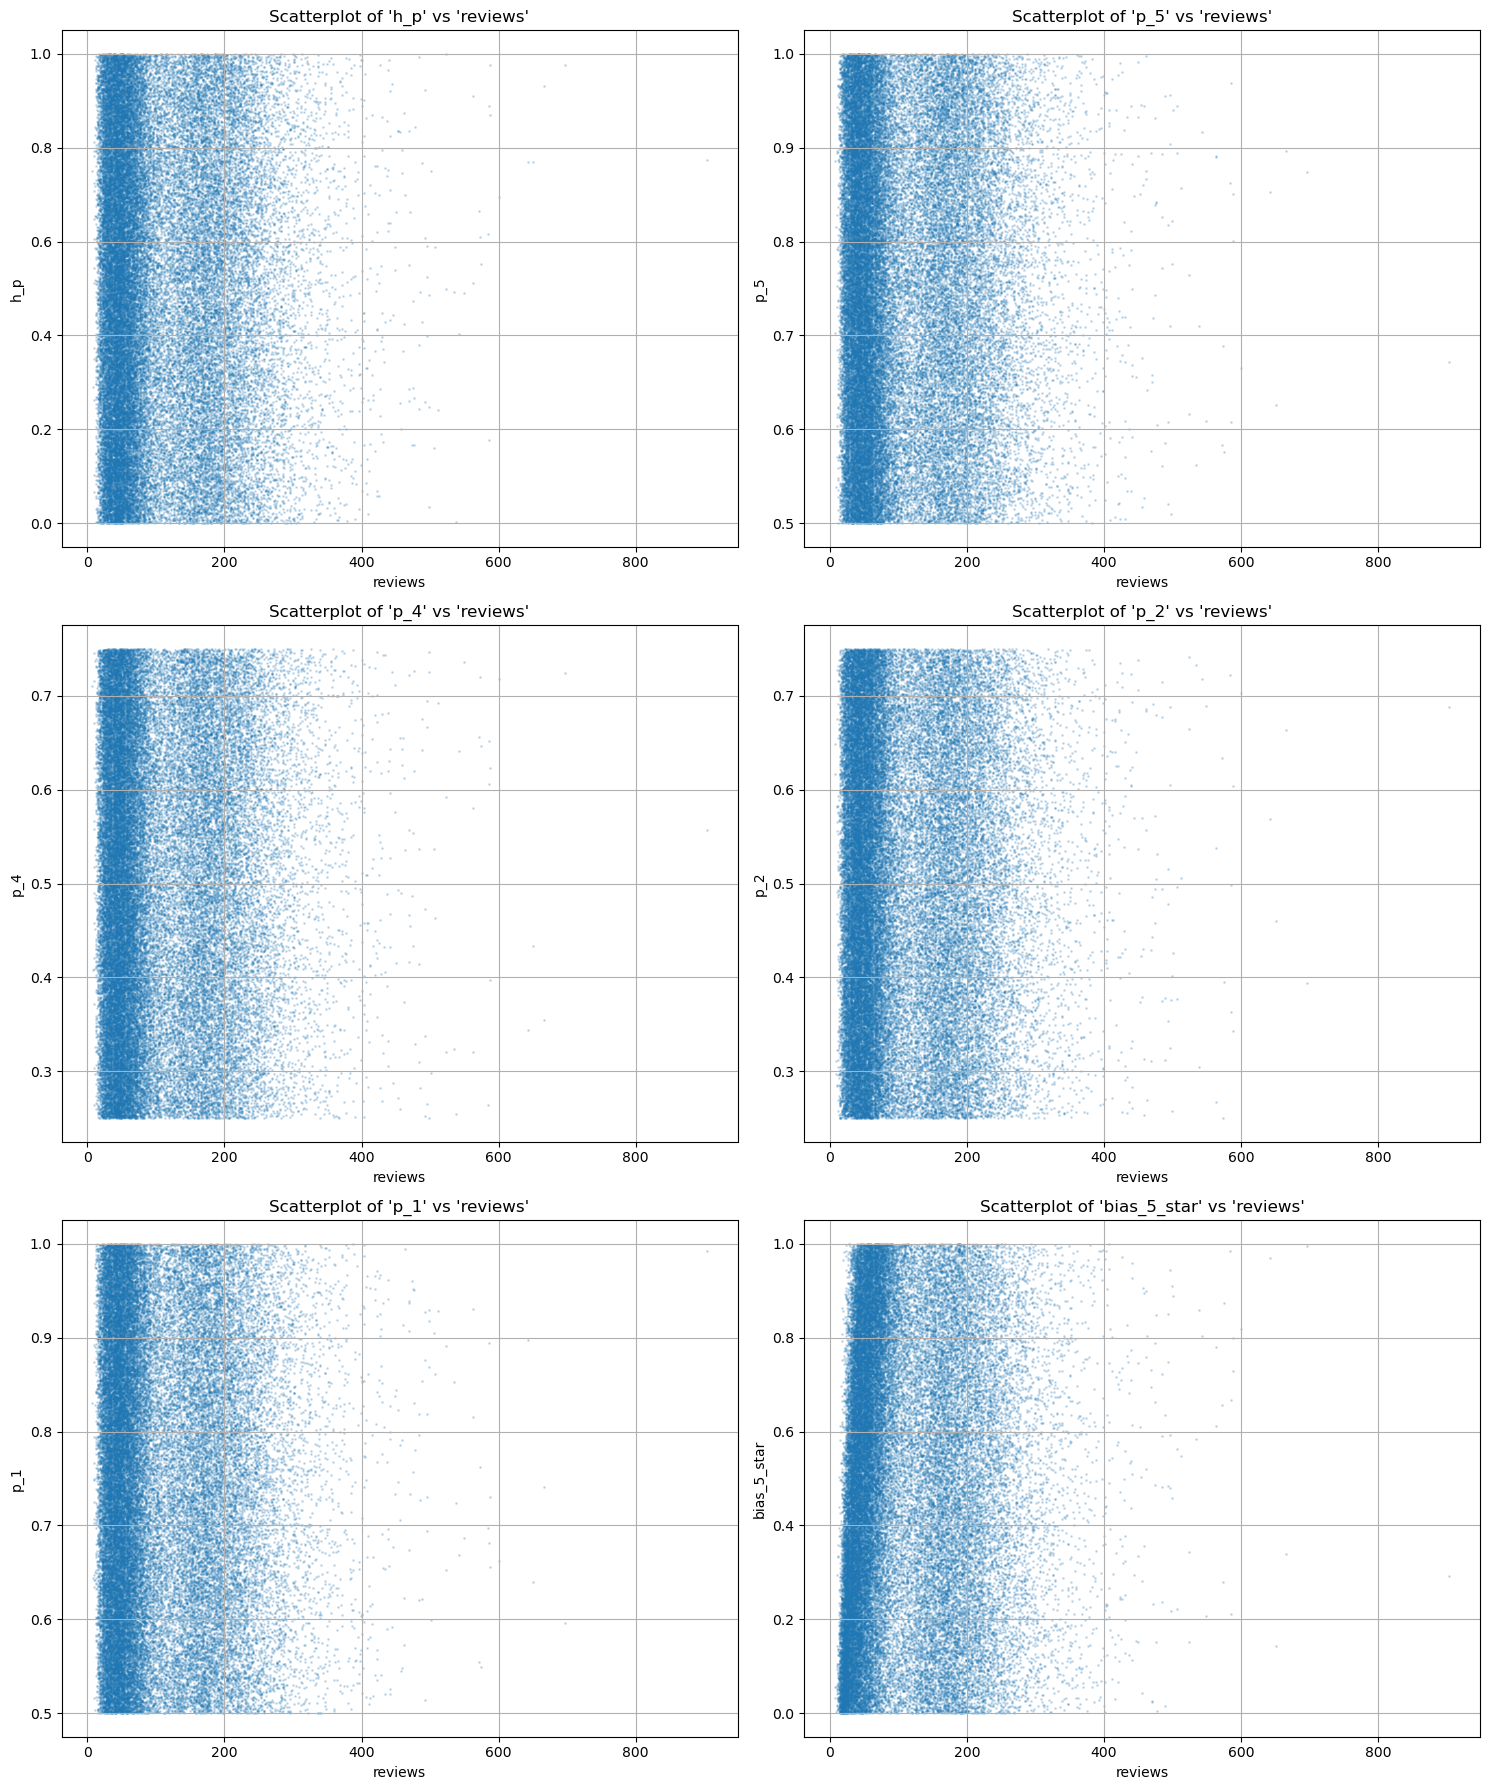

In [19]:
# Define the columns and their names for iteration
columns = ['h_p', 'p_5', 'p_4', 'p_2', 'p_1', 'bias_5_star']
column_names = ["h_p", "p_5", "p_4", "p_2", "p_1", "bias_5_star"]

# Create a figure with 6 subplots, arranged in 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(15,18))

# Iterate over the columns and axes to create each scatterplot
for ax, column, name in zip(axs.ravel(), columns, column_names):
    ax.scatter(combined_data["reviews"], combined_data[column], alpha=0.2, s=1)
    ax.set_title(f"Scatterplot of '{name}' vs 'reviews'")
    ax.set_xlabel("reviews")
    ax.set_ylabel(name)
    ax.grid(True)

# Adjust the layout so the plots don't overlap
plt.tight_layout()
plt.show()

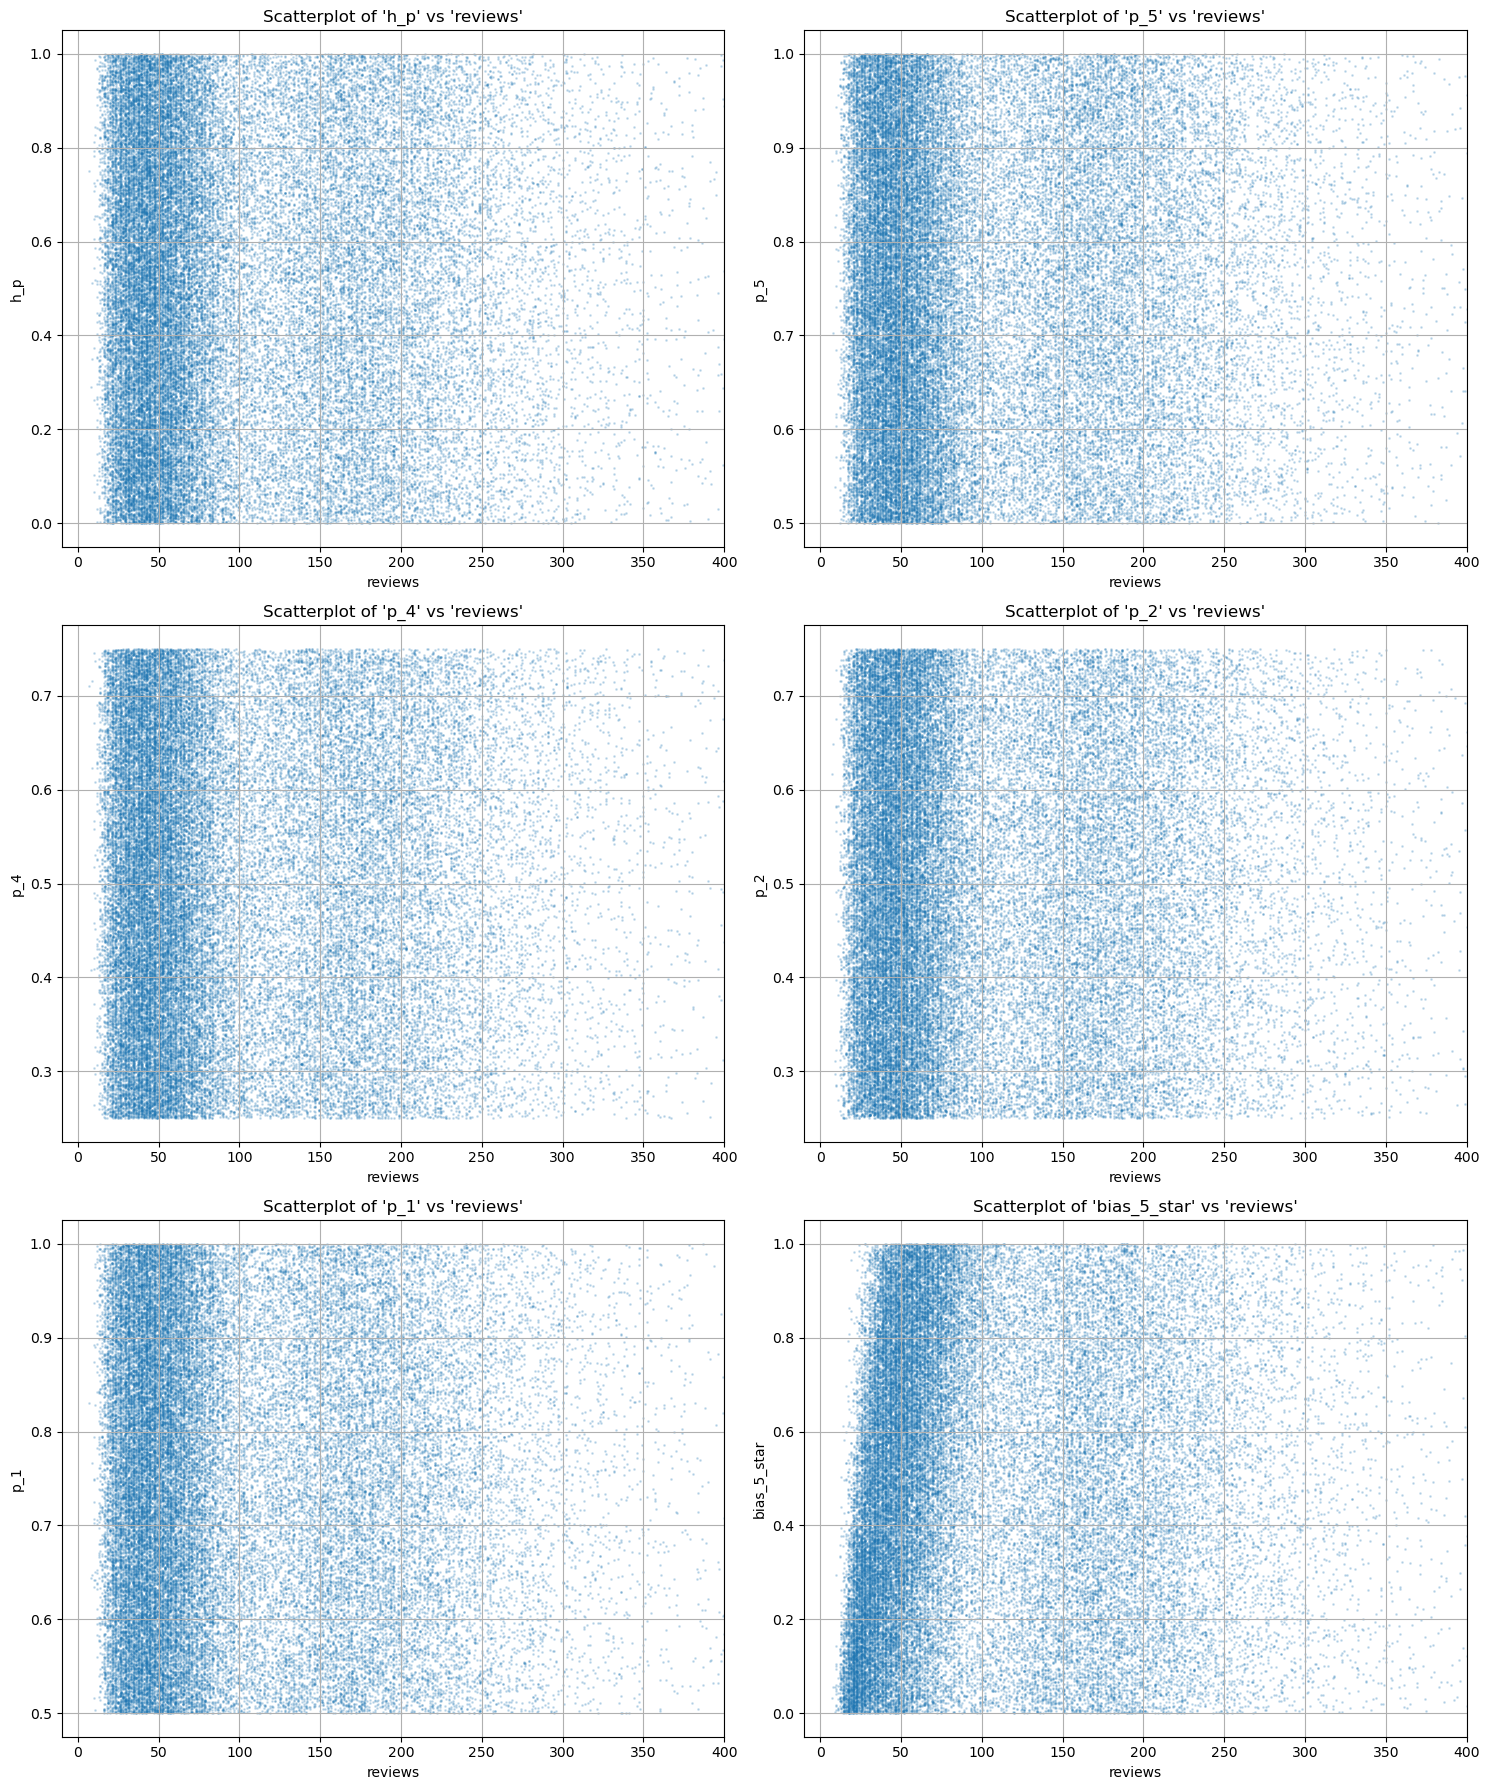

In [20]:
# Define the columns and their names for iteration (Only products with less thna 400 reviews)
columns = ['h_p', 'p_5', 'p_4', 'p_2', 'p_1', 'bias_5_star']
column_names = ["h_p", "p_5", "p_4", "p_2", "p_1", "bias_5_star"]

# Create a figure with 6 subplots, arranged in 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(15,18))

# Iterate over the columns and axes to create each scatterplot
for ax, column, name in zip(axs.ravel(), columns, column_names):
    ax.scatter(combined_data["reviews"], combined_data[column], alpha=0.2, s=1)
    ax.set_title(f"Scatterplot of '{name}' vs 'reviews'")
    ax.set_xlabel("reviews")
    ax.set_ylabel(name)
    ax.set_xlim(-10,400)
    ax.grid(True)

# Adjust the layout so the plots don't overlap
plt.tight_layout()
plt.show()

### D. Context: simulation settings

- 32 marketplaces
- Tendency to rate at 5%
- Mode as reference metric for Herding
- 5 Ratings as the minimum value for Herding to start happening
- 5 virtual products as the consideration set for users
- 1600 products per marketplace
- 160000 ratings required to conclude the simulation of a given marketplace (100 per product on average)


### E. Correlations summary table

In [21]:
from prettytable import PrettyTable

# Create a new table
table = PrettyTable()

# Define the columns
table.field_names = ["Parameter", "Pearson Correlation", "Spearman Correlation"]

# Correlation data for each parameter
correlations = {
    "rho+": [-0.7875, -0.7895],
    "rho-": [-0.2473, -0.3451],
    "h_p": [0.0102, 0.0087],
    "p_5": [0.0269, 0.0188],
    "p_4": [0.0244, 0.0149],
    "p_2": [0.0034, 0.0037],
    "p_1": [-0.0004, 0.0008],
    "bias_5_star": [0.0482, 0.131]
}

# Fill the table with the data
for param, corrs in correlations.items():
    if param == "rho-":
        table.add_row([param, corrs[0], corrs[1]], divider=True)
    else:
        table.add_row([param, corrs[0], corrs[1]])

# Print the table
print(table)

+-------------+---------------------+----------------------+
|  Parameter  | Pearson Correlation | Spearman Correlation |
+-------------+---------------------+----------------------+
|     rho+    |       -0.7875       |       -0.7895        |
|     rho-    |       -0.2473       |       -0.3451        |
+-------------+---------------------+----------------------+
|     h_p     |        0.0102       |        0.0087        |
|     p_5     |        0.0269       |        0.0188        |
|     p_4     |        0.0244       |        0.0149        |
|     p_2     |        0.0034       |        0.0037        |
|     p_1     |       -0.0004       |        0.0008        |
| bias_5_star |        0.0482       |        0.131         |
+-------------+---------------------+----------------------+
